# EDA & Data Processing

In [ ]:
import pandas as pd
from pandas_datareader import data as dtr
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime
import yfinance as yfin
yfin.pdr_override()

from datetime import datetime

%matplotlib inline
sns.set()

import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score



In [ ]:
# Separate by tickers

matic = dtr.get_data_yahoo('MATIC-USD',start='2018-01-01',end='2023-01-01')


ada = dtr.get_data_yahoo('ADA-USD',start='2018-01-01',end='2023-01-01')


bnb = dtr.get_data_yahoo('BNB-USD',start='2018-01-01',end='2023-01-01')


doge = dtr.get_data_yahoo('DOGE-USD',start='2018-01-01',end='2023-01-01')


eth = dtr.get_data_yahoo('ETH-USD',start='2018-01-01',end='2023-01-01')



xrp = dtr.get_data_yahoo('XRP-USD',start='2018-01-01',end='2023-01-01')


btc = dtr.get_data_yahoo('BTC-USD',start='2018-01-01',end='2023-01-01')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Separate Close Columns

maticClose = matic.filter(['Close'])
maticCloseArr = maticClose.values

adaClose = ada.filter(['Close'])
adaCloseArr = adaClose.values

bnbClose = bnb.filter(['Close'])
bnbCloseArr = bnbClose.values


dogeClose = doge.filter(['Close'])
dogeCloseArr = dogeClose.values

ethClose = eth.filter(['Close'])
ethCloseArr = ethClose.values

btcClose = btc.filter(['Close'])
btcCloseArr = btcClose.values

xrpClose = xrp.filter(['Close'])
xrpCloseArr = xrpClose.values


In [ ]:
# Candlestick Chart Function

def candleStickChart(dataFrame,label):

    c = go.Figure(data = [go.Candlestick(x=dataFrame.index,open = dataFrame['Close'],high = dataFrame['High'], low = dataFrame['Low'],close = dataFrame['Open'])])
    c.update_xaxes(title_text = 'Date',rangeslider_visible = True)
    c.update_layout(
    title = {'text': '{:} Candelstick Chart'.format(label), "y":0.9,"x":0.5,'xanchor': 'center','yanchor': 'top'})
    c.update_yaxes(title_text = 'Price', ticksuffix = '$')
    return c

# Descriptive Statistics Function

def descriptiveStat(dataFrame):
  stat = dataFrame.describe()
  stat = stat[['Close','High','Low']]
  stat = stat.iloc[1: , :]
  return stat

# Function for Lowest vs Highest Price

def lowHighPlt(dataFrame):
  dataFrame.plot(x='Low', y='High', style='o',figsize=(8,8))
  plt.xlabel('Low')
  plt.ylabel('High')
  plt.title('Lowest Price vs Highest Price')
  plt.show()


def closingPriceHistory(dataFrame,Title):
  # Visualize closing price history
  plt.figure(figsize=(16,8))
  plt.title(Title)
  plt.plot(dataFrame['Close'])
  plt.xlabel('Date')
  plt.ylabel('Close Price USD ($)')
  plt.show()

def trainLen(x):
  trainingDataLen = math.ceil(len(x) * .7)
  return trainingDataLen


## Matic

In [ ]:
matic.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-28,0.004521,0.004545,0.004317,0.004421,0.004421,8408136
2019-04-29,0.004418,0.004492,0.003471,0.003471,0.003471,8267044
2019-04-30,0.003462,0.005078,0.003458,0.004478,0.004478,25072706
2019-05-01,0.004440,0.004673,0.004071,0.004374,0.004374,10567352
2019-05-02,0.004366,0.004700,0.004096,0.004198,0.004198,6714908


In [ ]:
maticStat = descriptiveStat(matic)
maticStat

,Close,High,Low
mean,0.591814,0.621928,0.561367
std,0.685711,0.721881,0.649836
min,0.003141,0.003380,0.003012
25%,0.018085,0.019013,0.017271
50%,0.198964,0.221558,0.179700
75%,1.052526,1.111731,1.013680
max,2.876757,2.923235,2.712710


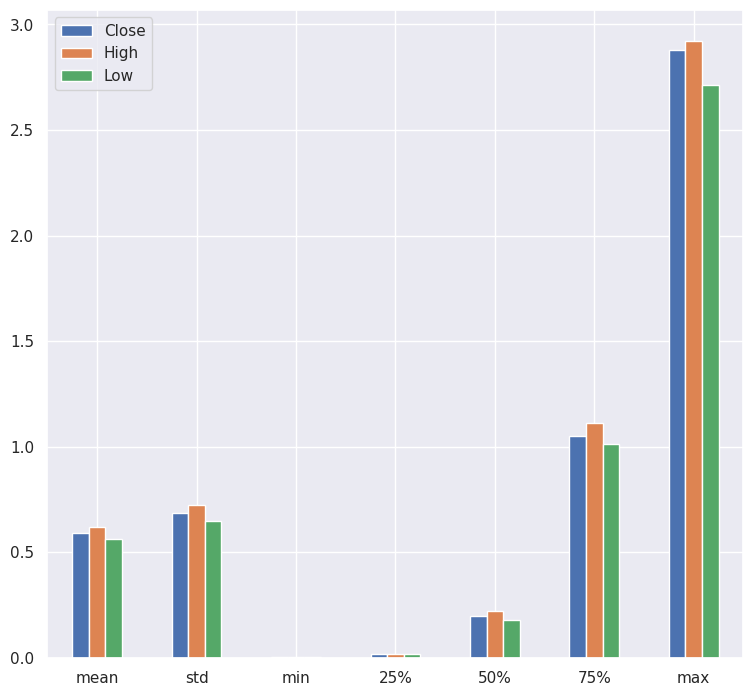

In [ ]:
statbar = maticStat.plot.bar(rot=0,figsize=(8,8))

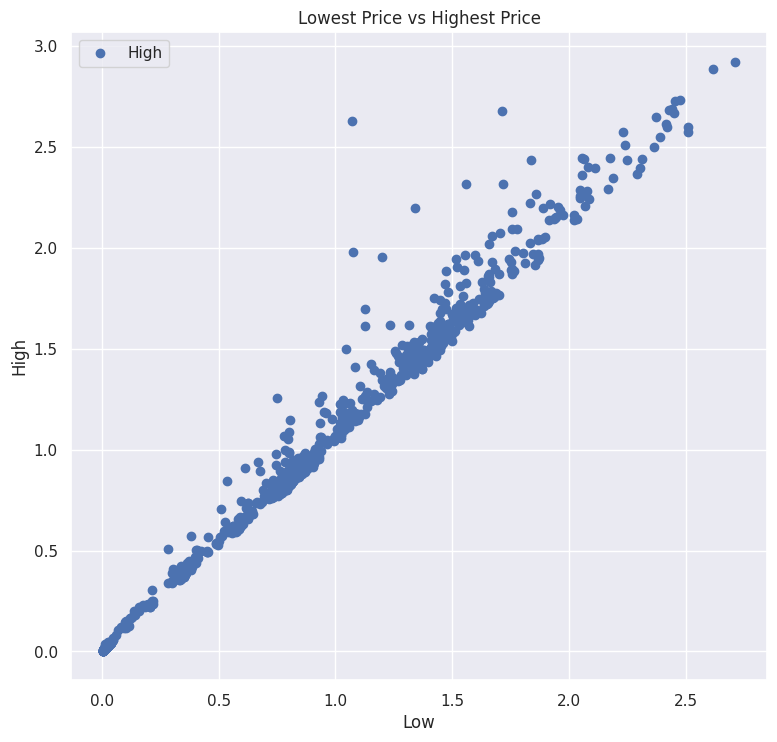

In [ ]:
maticLowHigh = lowHighPlt(matic)
maticLowHigh

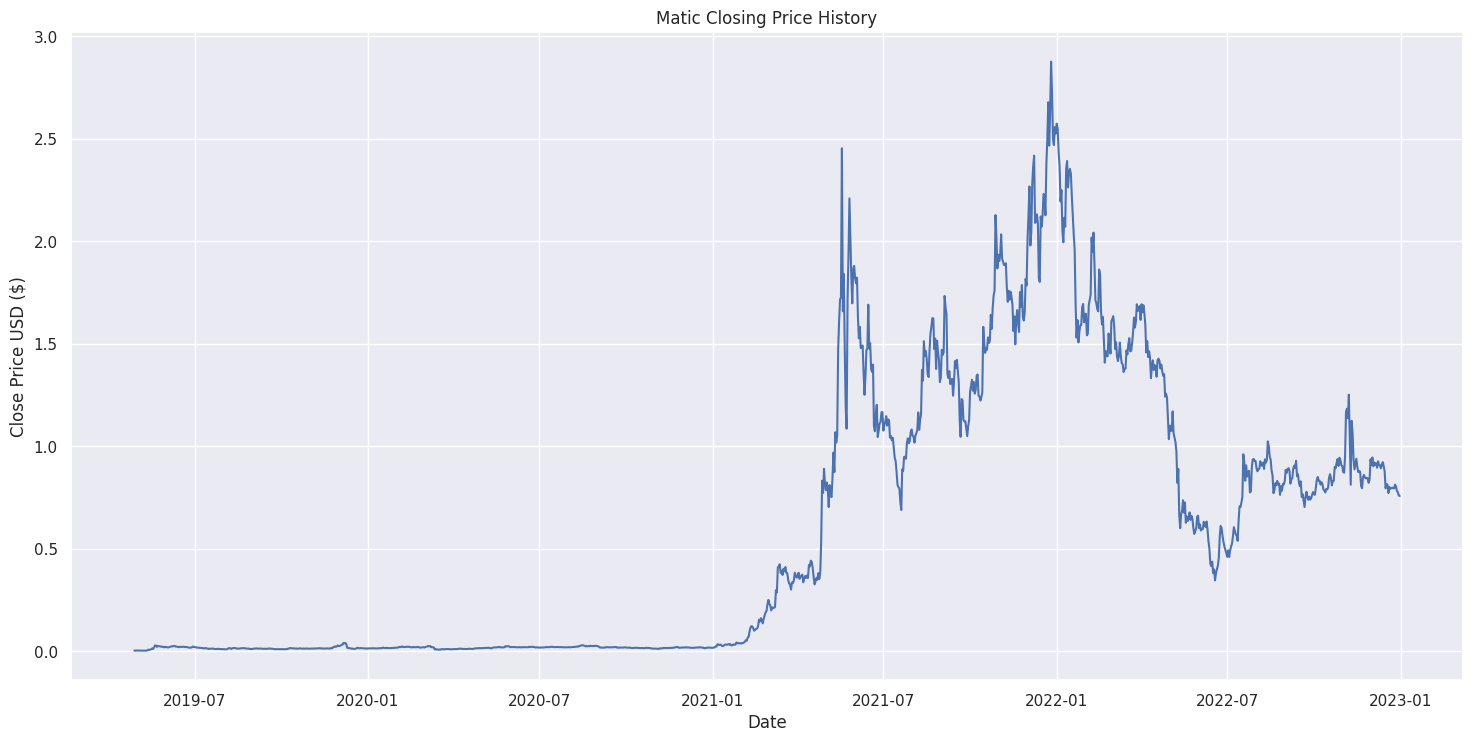

In [ ]:
closingPrice = closingPriceHistory(matic,'Matic Closing Price History')
closingPrice

In [ ]:
# Candlestick Chart

maticCandle=candleStickChart(matic, label="MATIC")
maticCandle.show()

## ADA

In [ ]:
ada.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,0.718847,0.730051,0.671941,0.728657,0.728657,150186000
2018-01-02,0.724676,0.794646,0.697856,0.782587,0.782587,289712000
2018-01-03,0.779681,1.085670,0.778578,1.079660,1.079660,657398016
2018-01-04,1.094030,1.327210,1.037650,1.114120,1.114120,593430016
2018-01-05,1.171150,1.252420,0.903503,0.999559,0.999559,508100000


In [ ]:
adaStat = descriptiveStat(ada)
adaStat

,Close,High,Low
mean,0.498572,0.519724,0.475965
std,0.630455,0.657253,0.601819
min,0.023961,0.025993,0.019130
25%,0.064918,0.068725,0.062925
50%,0.159863,0.166752,0.153244
75%,0.790289,0.814735,0.750407
max,2.968239,3.099186,2.907606


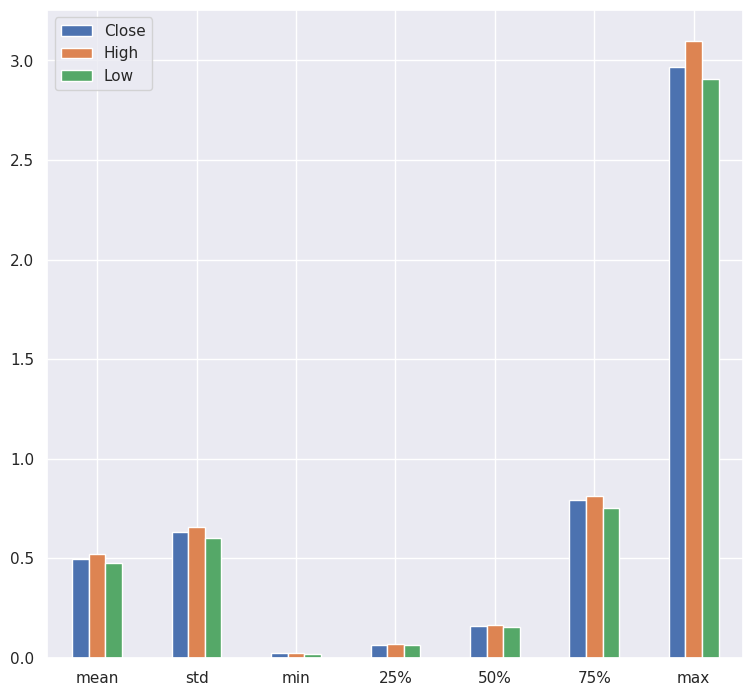

In [ ]:
statbar = adaStat.plot.bar(rot=0,figsize=(8,8))

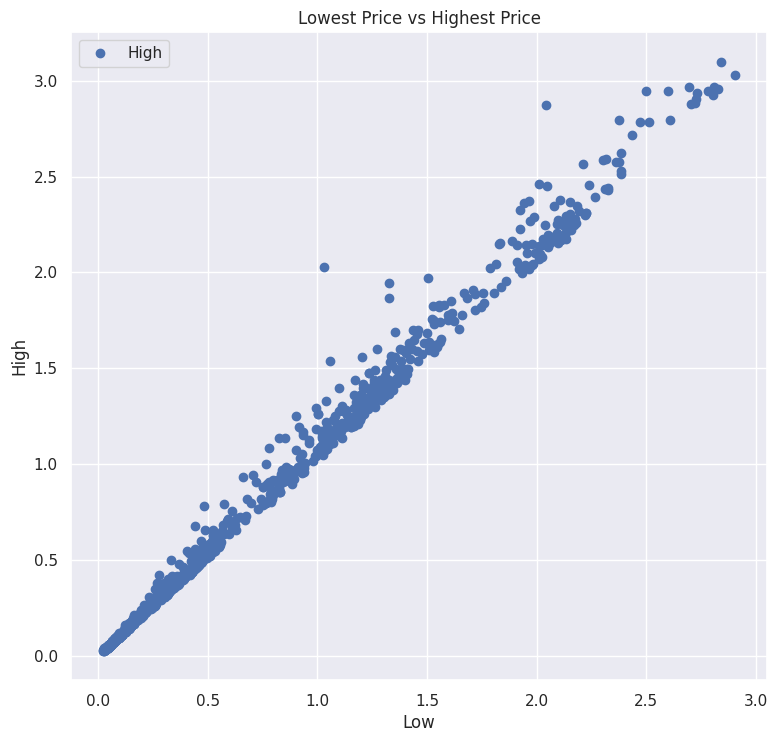

In [ ]:
adaLowHigh = lowHighPlt(ada)
adaLowHigh

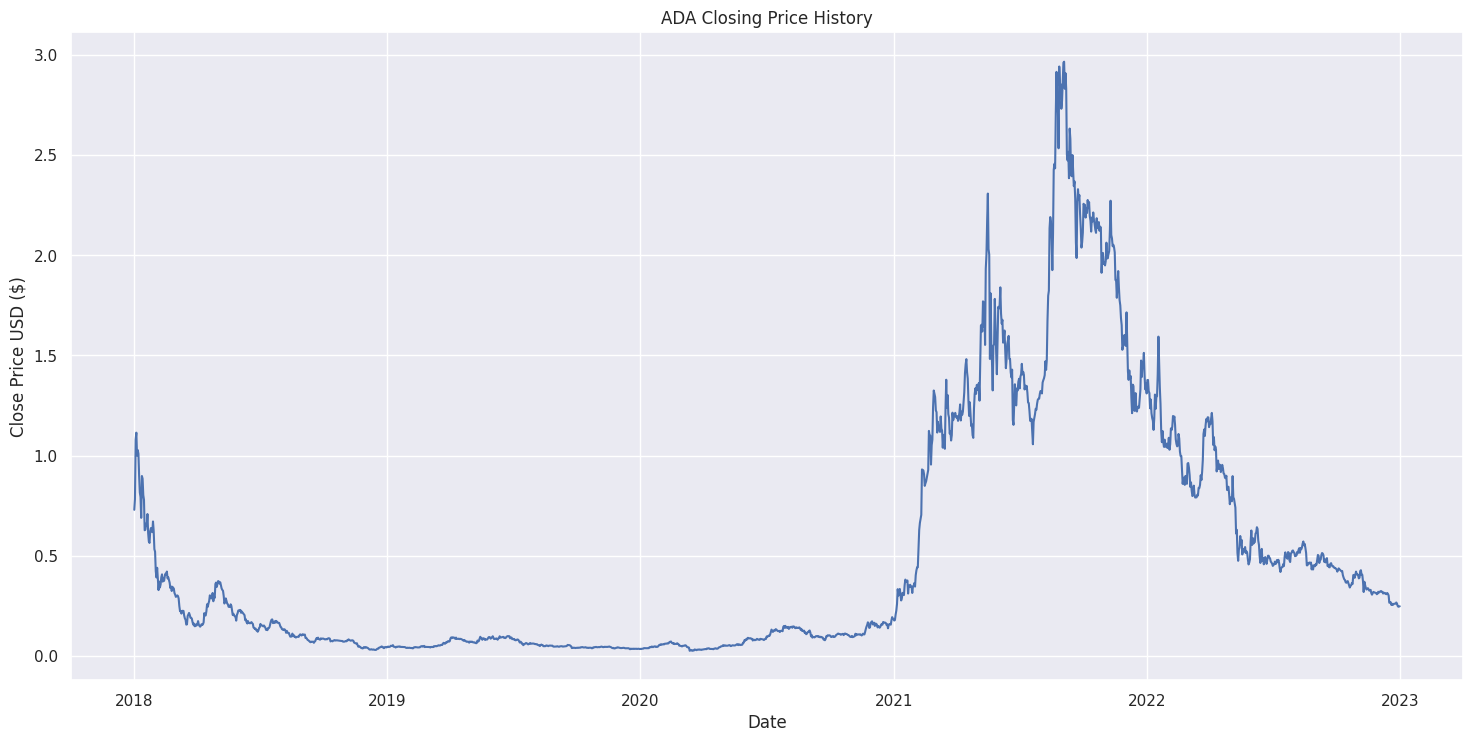

In [ ]:
closingPrice = closingPriceHistory(ada,'ADA Closing Price History')
closingPrice

In [ ]:
# Candlestick Chart

adaCandle=candleStickChart(ada, label="ADA")
adaCandle.show()

## BNB

In [ ]:
bnb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,8.62953,8.700570,7.95922,8.41461,8.41461,66422800
2018-01-02,8.45770,9.122590,8.21718,8.83777,8.83777,104789000
2018-01-03,8.77014,9.580780,8.52918,9.53588,9.53588,108852000
2018-01-04,9.44584,9.538490,8.85413,9.21399,9.21399,158819008
2018-01-05,9.14568,16.717699,9.09468,14.91720,14.91720,341504992


In [ ]:
bnbStat = descriptiveStat(bnb)
bnbStat

,Close,High,Low
mean,150.989047,155.907615,145.402999
std,183.832112,189.954205,177.152680
min,4.528650,4.635010,4.189971
25%,14.838099,15.319447,14.211525
50%,27.456247,28.091400,26.714112
75%,296.411873,304.529045,286.129143
max,675.684082,690.931946,634.549500


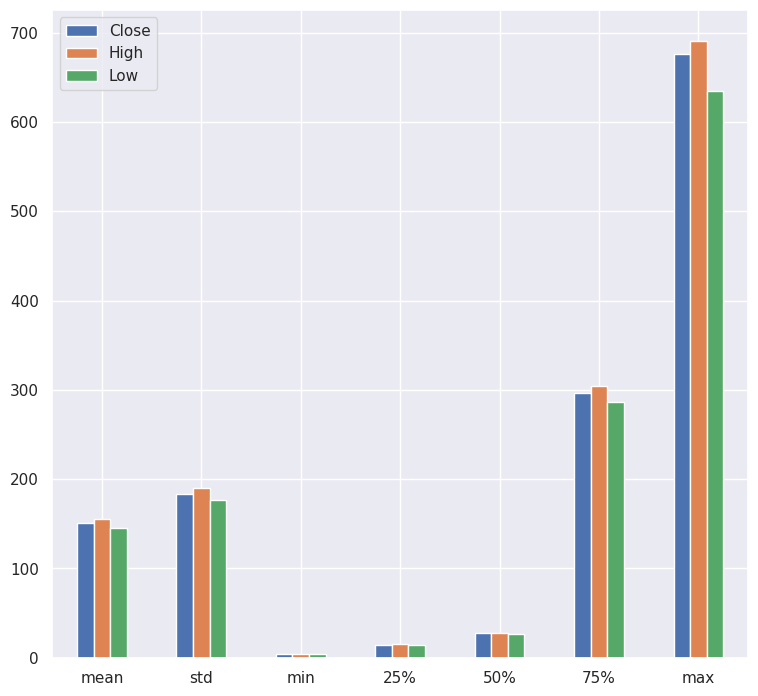

In [ ]:
statbar = bnbStat.plot.bar(rot=0,figsize=(8,8))

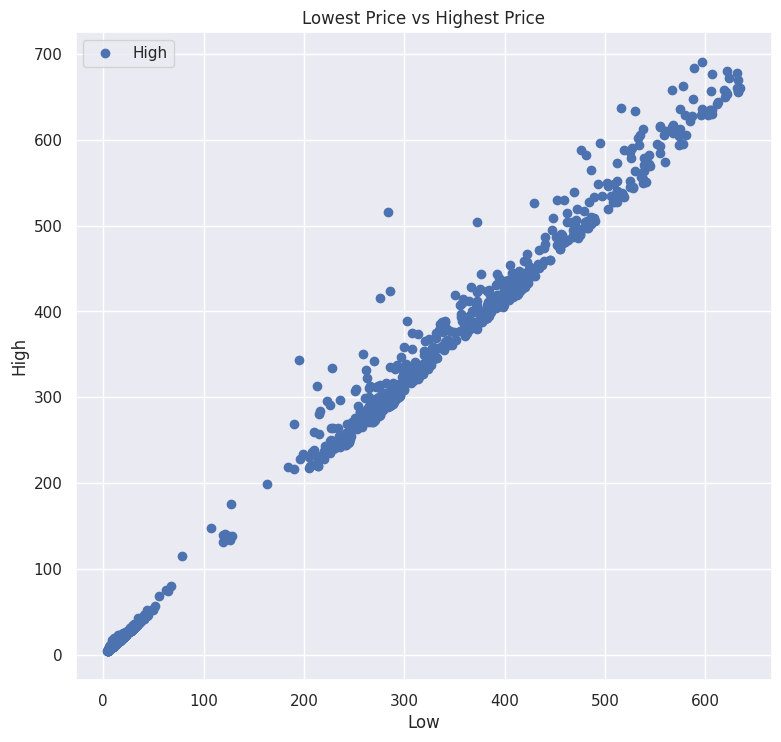

In [ ]:
bnbLowHigh = lowHighPlt(bnb)
bnbLowHigh

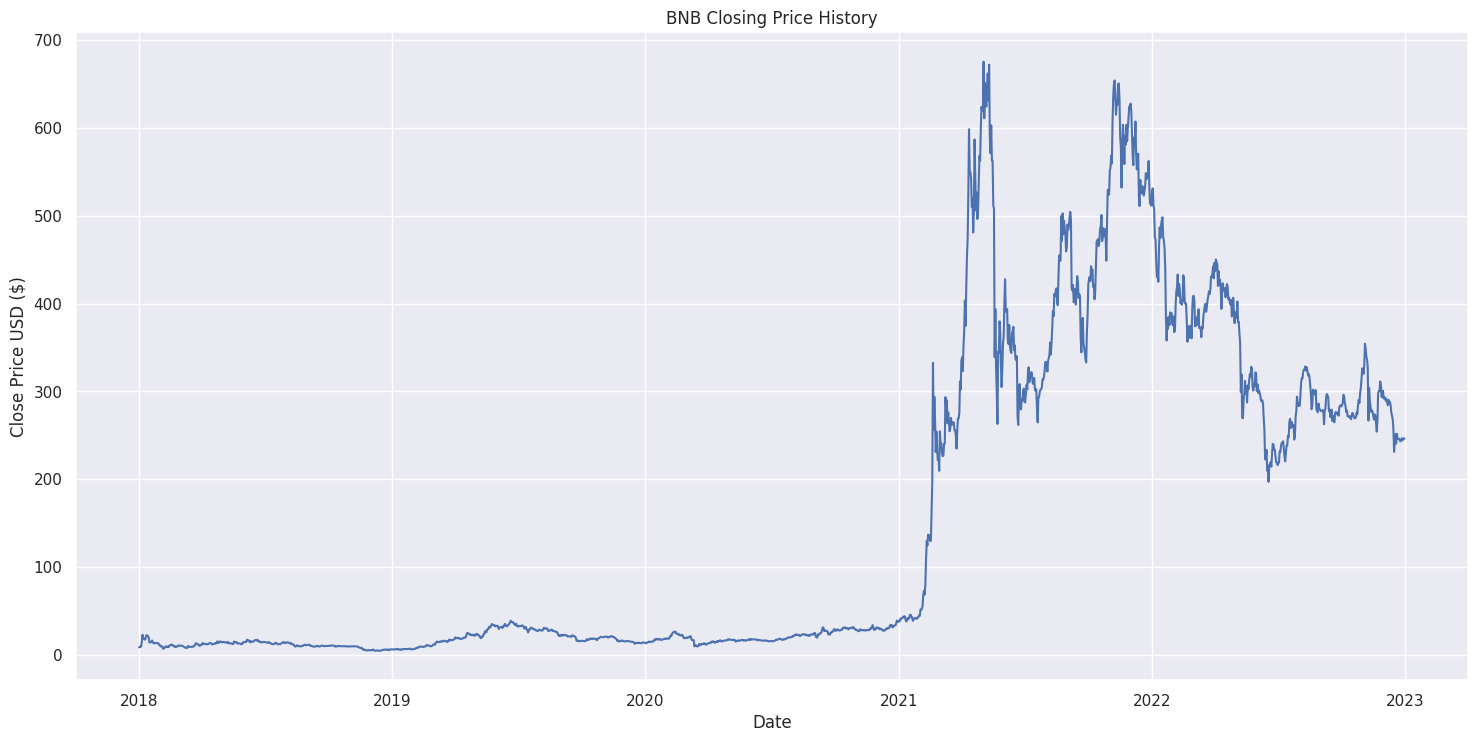

In [ ]:
closingPrice = closingPriceHistory(bnb,'BNB Closing Price History')
closingPrice

In [ ]:
# Candlestick Chart

bnbCandle=candleStickChart(bnb, label="BNB")
bnbCandle.show()

## Doge

In [ ]:
doge.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,0.009031,0.009063,0.008101,0.008909,0.008909,50616900
2018-01-02,0.008873,0.009598,0.008551,0.009145,0.009145,89424096
2018-01-03,0.009088,0.009584,0.008882,0.009320,0.009320,66349900
2018-01-04,0.009346,0.010036,0.008768,0.009644,0.009644,108986000
2018-01-05,0.009660,0.012283,0.009589,0.012167,0.012167,212383008


In [ ]:
dogeStat = descriptiveStat(doge)
dogeStat

,Close,High,Low
mean,0.062432,0.066003,0.058893
std,0.099268,0.106908,0.091744
min,0.001537,0.001612,0.001247
25%,0.002607,0.002655,0.002557
50%,0.003889,0.004245,0.003700
75%,0.082357,0.085069,0.079749
max,0.684777,0.737567,0.608168


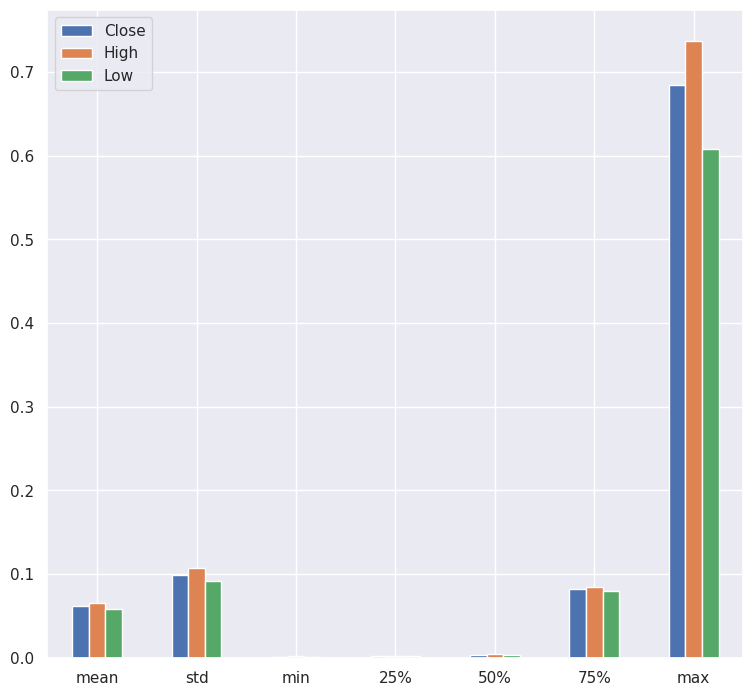

In [ ]:
statBar = dogeStat.plot.bar(rot=0,figsize=(8,8))

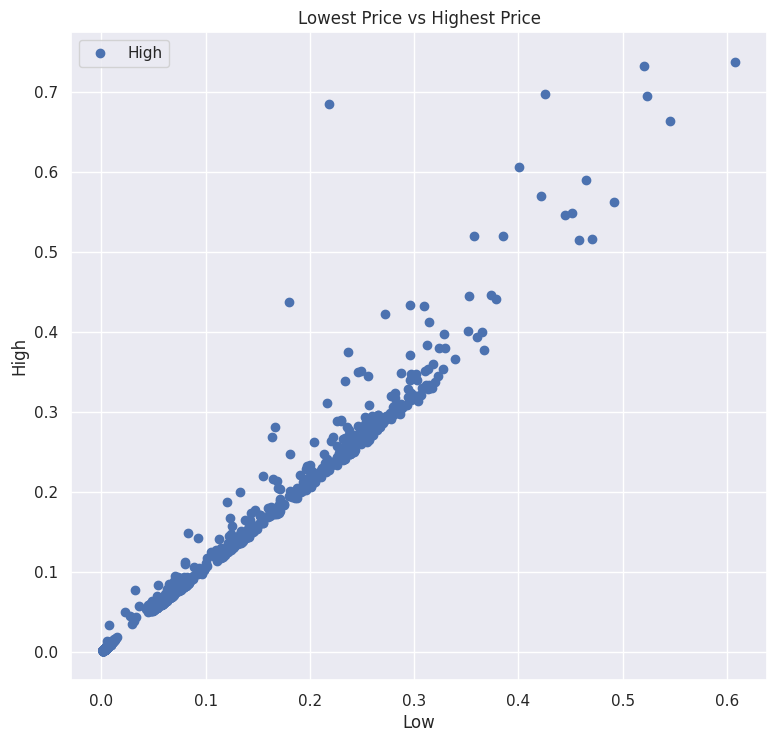

In [ ]:
dogeLowHigh = lowHighPlt(doge)
dogeLowHigh

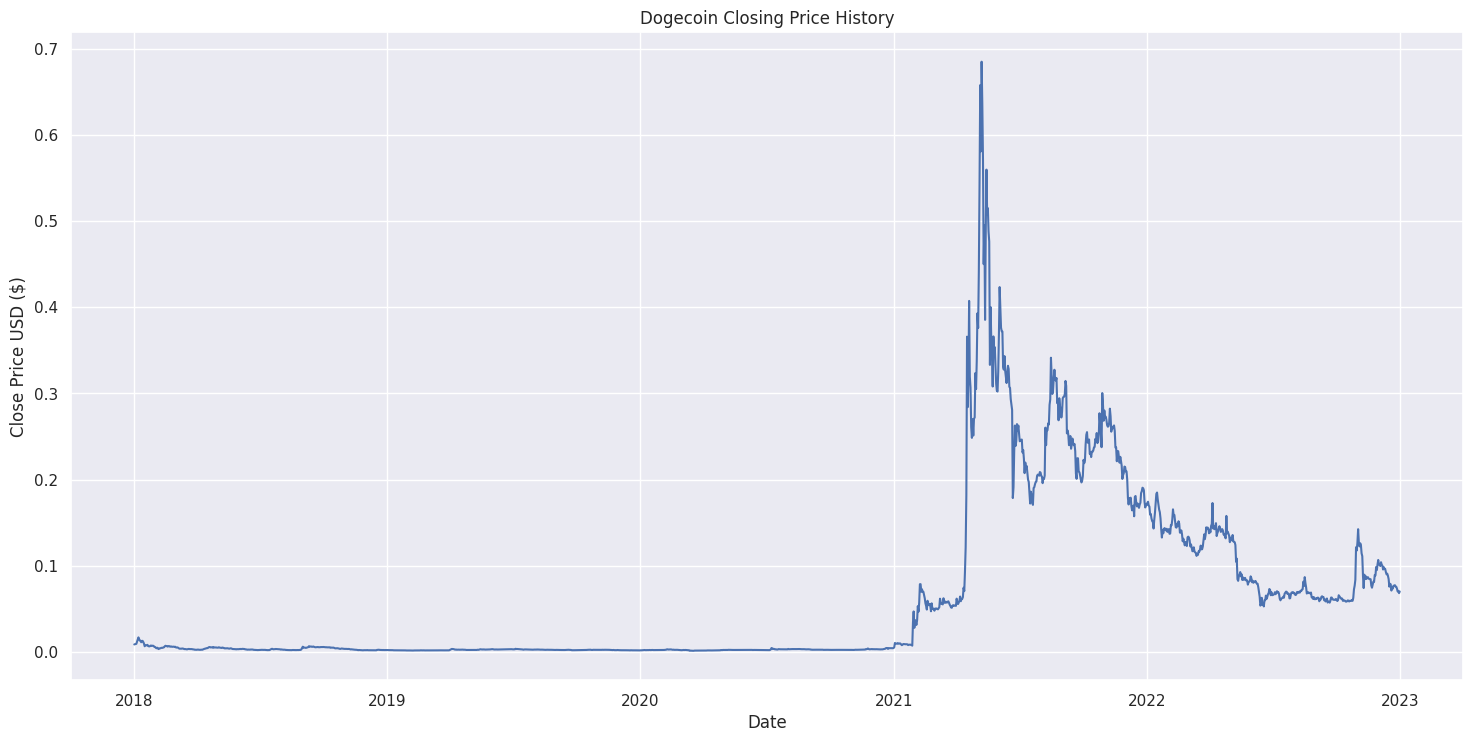

In [ ]:
closingPrice = closingPriceHistory(doge,'Dogecoin Closing Price History')
closingPrice

In [ ]:
# Candlestick Chart

dogeCandle=candleStickChart(bnb, label="Dogecoin")
dogeCandle.show()

## Ethereum

In [ ]:
eth.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,755.757019,782.530029,742.004028,772.640991,772.640991,2595760128
2018-01-02,772.346008,914.830017,772.346008,884.443970,884.443970,5783349760
2018-01-03,886.000000,974.471008,868.450989,962.719971,962.719971,5093159936
2018-01-04,961.713013,1045.079956,946.085999,980.921997,980.921997,6502859776
2018-01-05,975.750000,1075.390015,956.325012,997.719971,997.719971,6683149824


In [ ]:
ethStat = descriptiveStat(eth)
ethStat

,Close,High,Low
mean,1147.253520,1183.756878,1105.414908
std,1200.263833,1237.621443,1158.264342
min,84.308296,85.342743,82.829887
25%,208.920326,213.732670,203.590523
50%,518.846069,532.949524,499.449005
75%,1803.337372,1839.998871,1732.771118
max,4812.087402,4891.704590,4718.039062


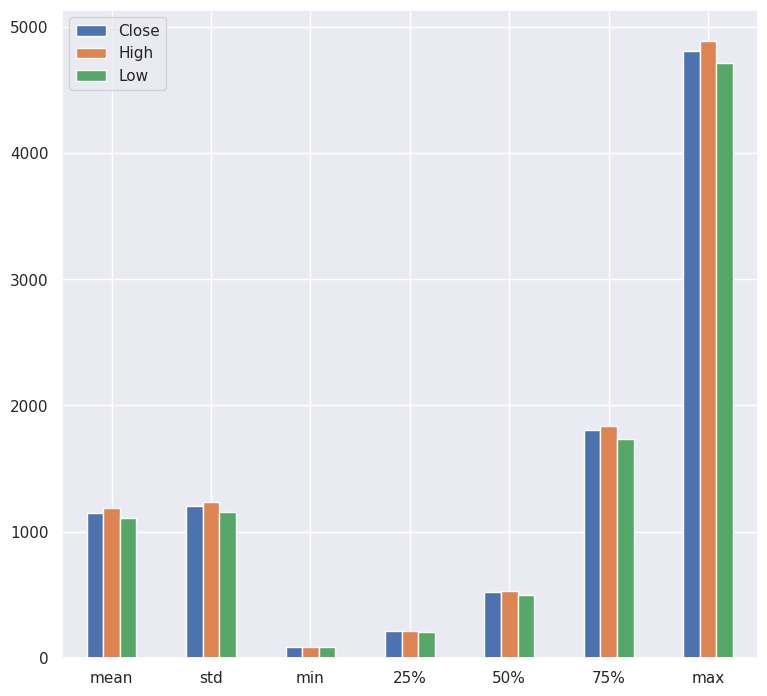

In [ ]:
statBar = ethStat.plot.bar(rot=0,figsize=(8,8))

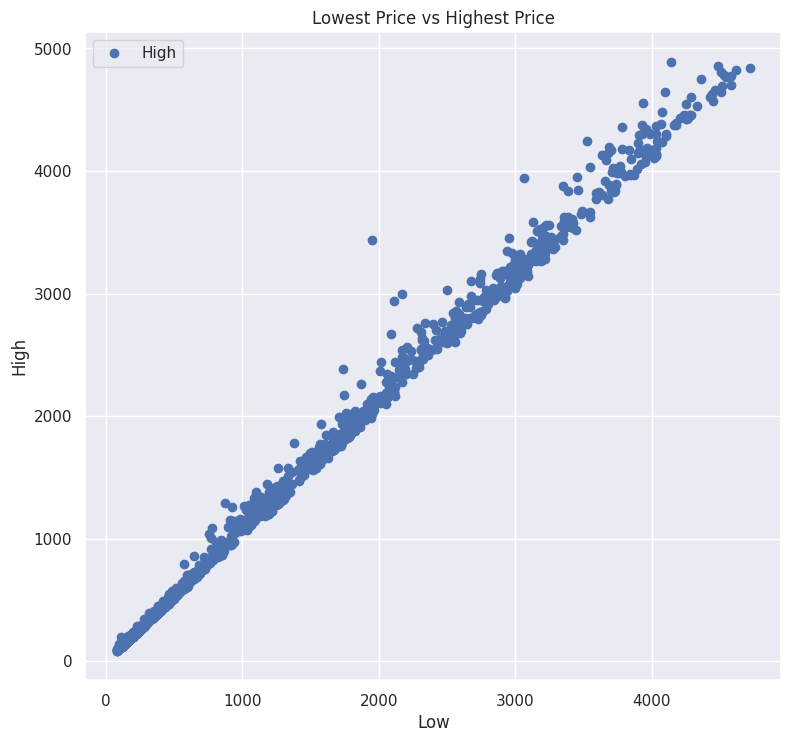

In [ ]:
ethLowHigh = lowHighPlt(eth)
ethLowHigh

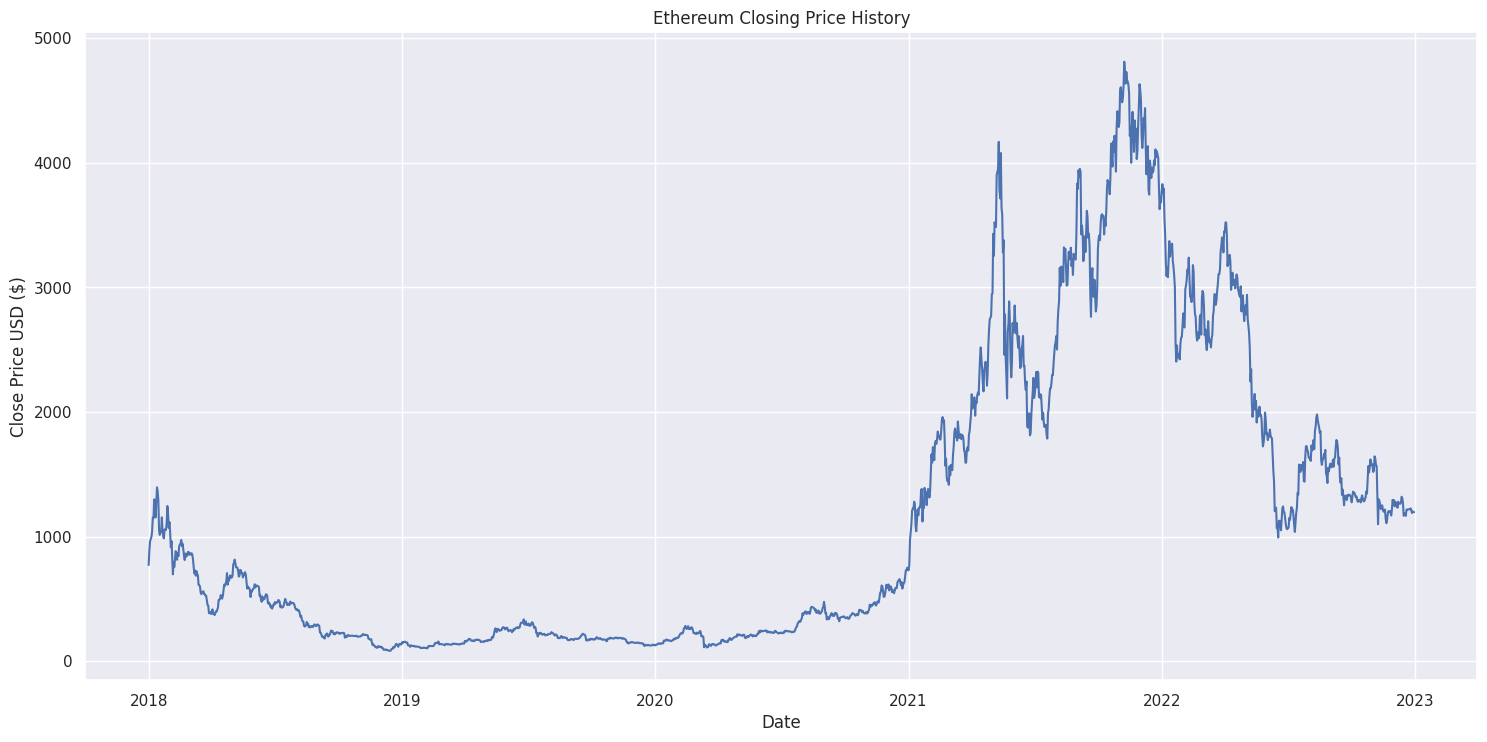

In [ ]:
closingPrice = closingPriceHistory(eth,'Ethereum Closing Price History')
closingPrice

In [ ]:
# Candlestick Chart

ethCandle=candleStickChart(eth, label="Ethereum")
ethCandle.show()

## XRP

In [ ]:
xrp.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,2.29602,2.39103,2.14897,2.39103,2.39103,1894230016
2018-01-02,2.36948,2.48919,2.24793,2.48090,2.48090,3171010048
2018-01-03,2.46410,3.27938,2.44315,3.10537,3.10537,6635879936
2018-01-04,3.11734,3.84194,3.11734,3.19663,3.19663,8103660032
2018-01-05,3.30081,3.56468,2.82561,3.04871,3.04871,6288500224


In [ ]:
xrpStat = descriptiveStat(xrp)
xrpStat

,Close,High,Low
mean,0.522932,0.545349,0.499848
std,0.357815,0.386698,0.331342
min,0.139635,0.146911,0.115093
25%,0.289399,0.299273,0.278680
50%,0.391430,0.405611,0.379746
75%,0.667264,0.692587,0.640288
max,3.377810,3.841940,3.117340


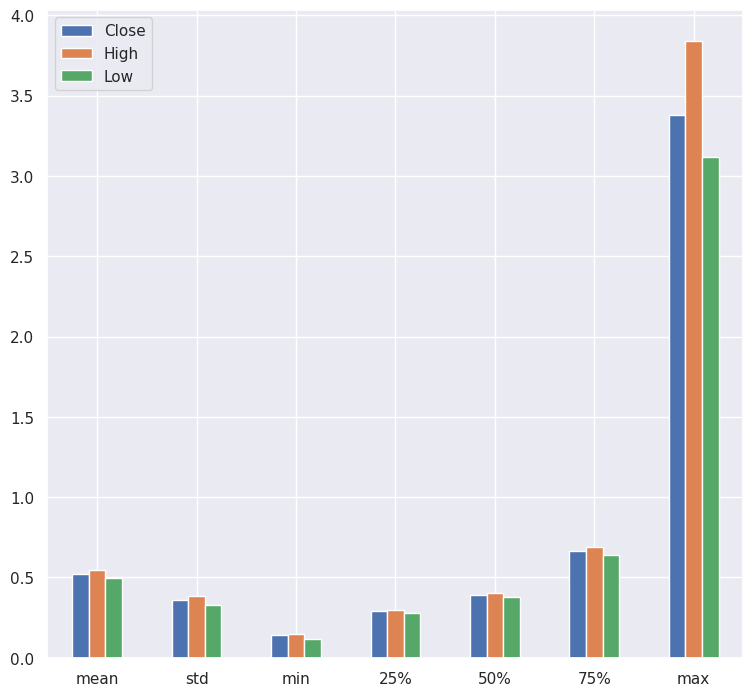

In [ ]:
statBar = xrpStat.plot.bar(rot=0,figsize=(8,8))

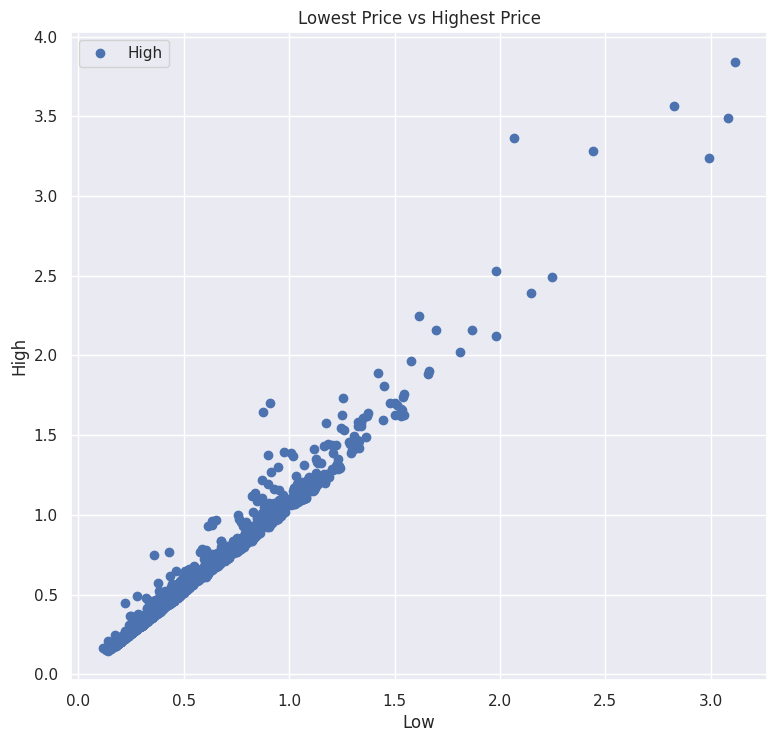

In [ ]:
xrpLowHigh = lowHighPlt(xrp)
xrpLowHigh

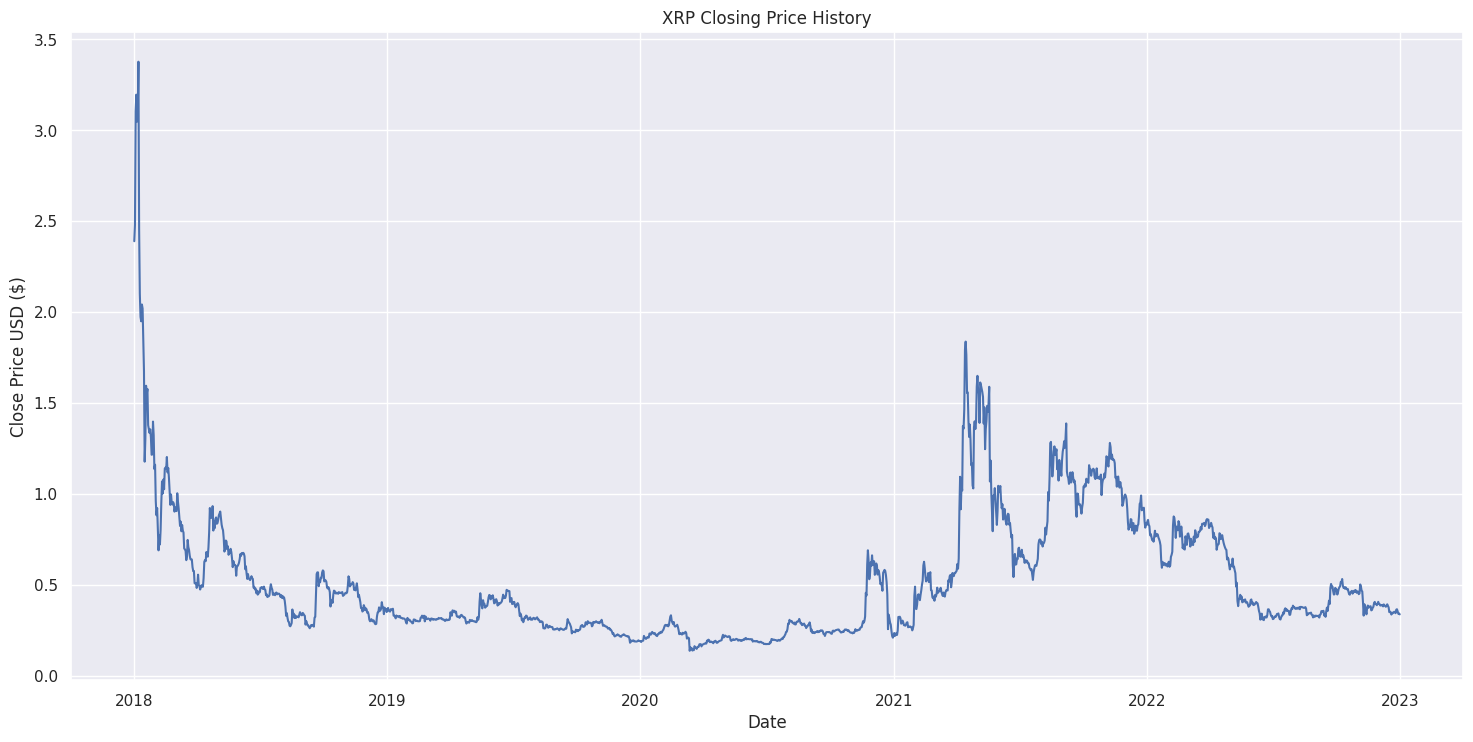

In [ ]:
closingPrice = closingPriceHistory(xrp,'XRP Closing Price History')
closingPrice

In [ ]:
# Candlestick Chart

xrpCandle=candleStickChart(xrp, label="XRP")
xrpCandle.show()

## Bitcoin

In [ ]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [ ]:
btcStat = descriptiveStat(btc)
btcStat

,Close,High,Low
mean,20338.668578,20839.385473,19772.518018
std,16986.017527,17435.085779,16475.643407
min,3236.761719,3275.377930,3191.303467
25%,7682.069092,7908.665894,7517.305298
50%,10960.592285,11301.309570,10652.977539
75%,33740.259766,34790.409180,32267.986816
max,67566.828125,68789.625000,66382.062500


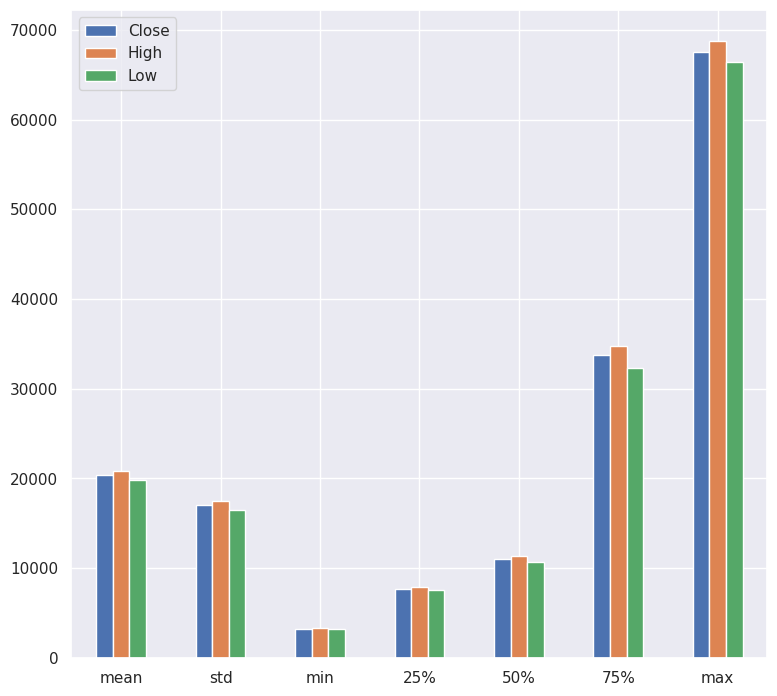

In [ ]:
statBar = btcStat.plot.bar(rot=0,figsize=(8,8))

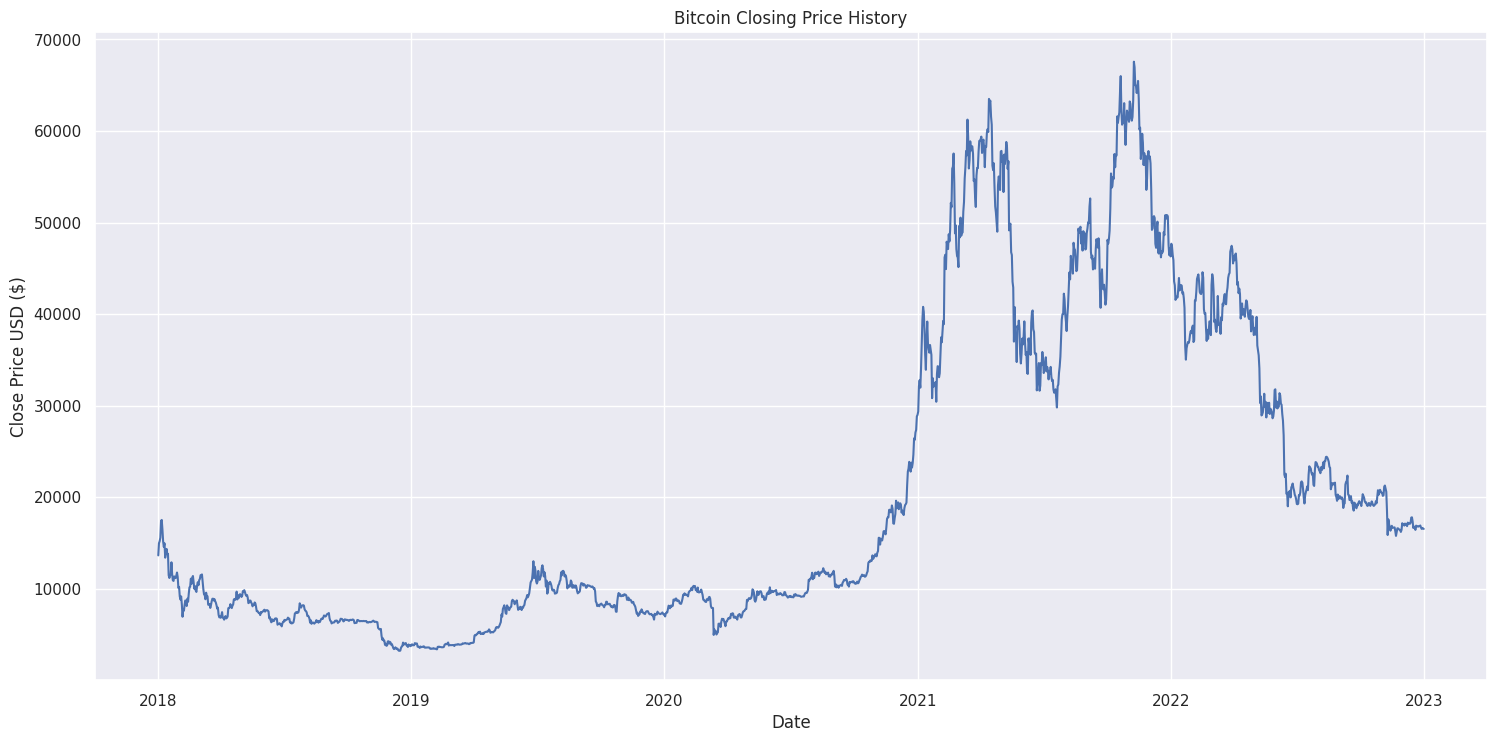

In [ ]:
closingPrice = closingPriceHistory(btc,'Bitcoin Closing Price History')
closingPrice

In [ ]:
# Candlestick Chart

btcCandle=candleStickChart(bnb, label="Bitcoin")
btcCandle.show()

# Artificial Neural Network for Prediction & LSTM

## Model 1 - Matic Model


In [ ]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(maticCloseArr)

# Get the Training Data
maticLen = trainLen(maticCloseArr)
trainingData = scaledData[0:maticLen, :]

# Train & Test Split
x_train = []
y_train = []

for i in range(60, len(trainingData)):
  x_train.append(trainingData[i-60:i,0])
  y_train.append(trainingData[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)



In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(881, 60, 1)

In [ ]:
# Build the LSTM Model

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
# Train the model

model.fit(x_train,y_train,batch_size=1,epochs=1)

881/881 [==============================] - 35s 34ms/step - loss: 0.0029


In [ ]:
# Testing Data Set

testData = scaledData[maticLen - 60: , :]

x_test = []

y_test = maticCloseArr[maticLen:, :]

for i in range(60, len(testData)):
  x_test.append(testData[i-60:i,0])





In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Prediction on the Testing Set

maticPredictions = model.predict(x_test)
maticPredictions = scaler.inverse_transform(maticPredictions)

13/13 [==============================] - 1s 20ms/step


In [ ]:
# Mean Absolute Error

mae = mean_absolute_error(y_test,maticPredictions)
mae

0.11917071181254707

In [ ]:
## Mean Squared Error

mse = mean_squared_error(y_test, maticPredictions)
mse

0.025439587926746422

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
x = mean_absolute_percentage_error(y_test, maticPredictions)
x


0.11335430808788996

In [ ]:
# Root Mean Squared Error

rmse = np.sqrt(mse)

<ipython-input-89-616dbc7b13bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = maticPredictions


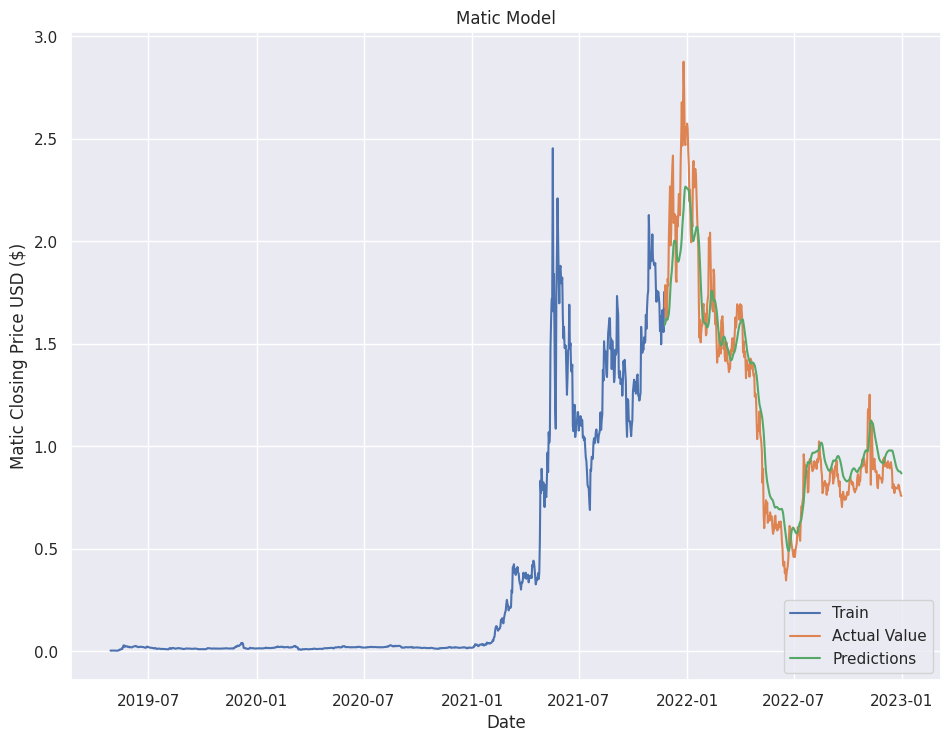

In [ ]:
# Data Plot

train = maticClose[:maticLen]
valid = maticClose[maticLen:]
valid['Predictions'] = maticPredictions

plt.figure(figsize=(10,8))
plt.title('Matic Model')
plt.xlabel('Date')
plt.ylabel('Matic Closing Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Actual Value','Predictions'], loc='lower right')
plt.show()

## Model 2 - ADA Mode

In [ ]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(adaCloseArr)

# Get the Training Data
adaLen = trainLen(adaCloseArr)
trainingData = scaledData[0:adaLen, :]

# Train & Test Split
x_train = []
y_train = []

for i in range(60, len(trainingData)):
  x_train.append(trainingData[i-60:i,0])
  y_train.append(trainingData[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


# Build the LSTM Model

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

# Train the model

model.fit(x_train,y_train,batch_size=1,epochs=1)


1219/1219 [==============================] - 46s 35ms/step - loss: 0.0017


In [ ]:
# Testing Data Set

testData = scaledData[adaLen - 60: , :]

x_test = []




y_test = adaCloseArr[adaLen:, :]

for i in range(60, len(testData)):
  x_test.append(testData[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))



In [ ]:
# Prediction on the Testing Set

adaPredictions = model.predict(x_test)
adaPredictions = scaler.inverse_transform(adaPredictions)

18/18 [==============================] - 1s 19ms/step


In [ ]:
# Mean Absolute Error

mae = mean_absolute_error(y_test, adaPredictions)
mae

0.1147996052908941

In [ ]:
## Mean Squared Error

mse = mean_squared_error(y_test, adaPredictions)
mse

0.027219485828132467

In [ ]:
# Root Mean Squared Error

rmse = np.sqrt(mse)
rmse

0.1649832895421002

In [ ]:
lossDf = pd.DataFrame(model.history.history)


In [ ]:
lossDf = pd.DataFrame(model.history.history)


<ipython-input-90-b19cd211df3b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = adaPredictions


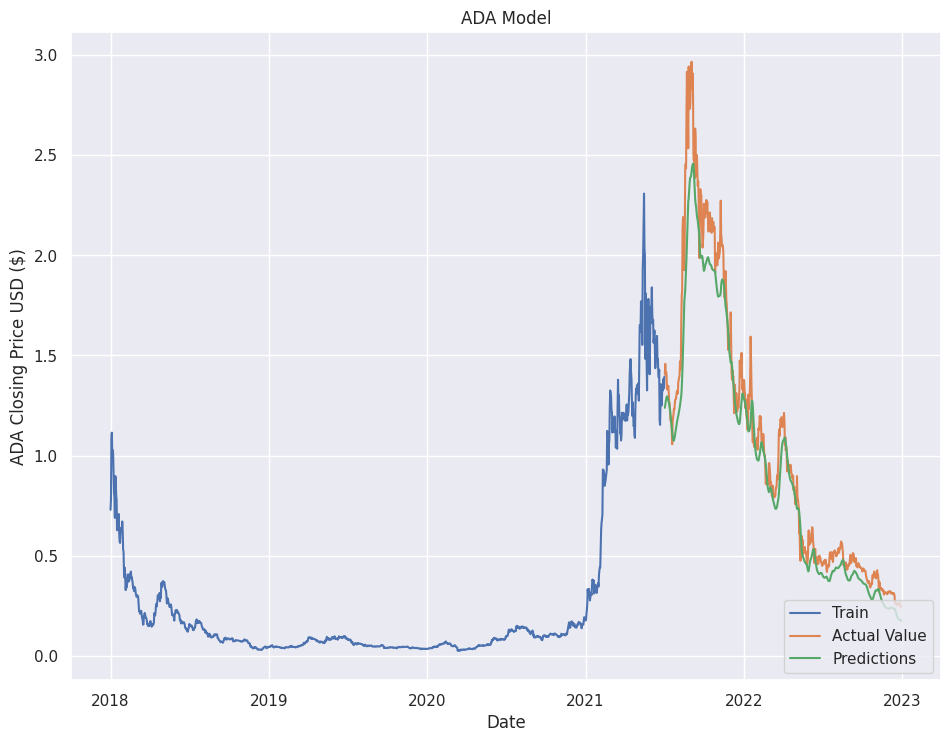

In [ ]:
# Data Plot

train = adaClose[:adaLen]
valid = adaClose[adaLen:]
valid['Predictions'] = adaPredictions

plt.figure(figsize=(10,8))
plt.title('ADA Model')
plt.xlabel('Date')
plt.ylabel('ADA Closing Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Actual Value','Predictions'], loc='lower right')
plt.show()

In [ ]:
ada.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,0.718847,0.730051,0.671941,0.728657,0.728657,150186000
2018-01-02,0.724676,0.794646,0.697856,0.782587,0.782587,289712000
2018-01-03,0.779681,1.085670,0.778578,1.079660,1.079660,657398016
2018-01-04,1.094030,1.327210,1.037650,1.114120,1.114120,593430016
2018-01-05,1.171150,1.252420,0.903503,0.999559,0.999559,508100000


## Model 3 - BNB Model

In [ ]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(bnbCloseArr)

# Get the Training Data
bnbLen = trainLen(bnbCloseArr)
trainingData = scaledData[0:bnbLen, :]

# Train & Test Split
x_train = []
y_train = []

for i in range(60, len(trainingData)):
  x_train.append(trainingData[i-60:i,0])
  y_train.append(trainingData[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


# Build the LSTM Model

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

# Train the model

model.fit(x_train,y_train,batch_size=1,epochs=1)


1219/1219 [==============================] - 48s 35ms/step - loss: 0.0047


In [ ]:
# Testing Data Set

testData = scaledData[bnbLen - 60: , :]

x_test = []

y_test = bnbCloseArr[bnbLen:, :]

for i in range(60, len(testData)):
  x_test.append(testData[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
# Prediction on the Testing Set

bnbPredictions = model.predict(x_test)
bnbPredictions = scaler.inverse_transform(bnbPredictions)

18/18 [==============================] - 3s 36ms/step


In [ ]:
## Mean Squared Error

mse = mean_squared_error(y_test, bnbPredictions)
mse

1740.616741481651

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
x = mean_absolute_percentage_error(y_test, bnbPredictions)
x


0.10361155281582043

In [ ]:
# Root Mean Squared Error

rmse = np.sqrt(mse)
rmse

42.138768796288176

<ipython-input-91-7f883b57afdb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = bnbPredictions


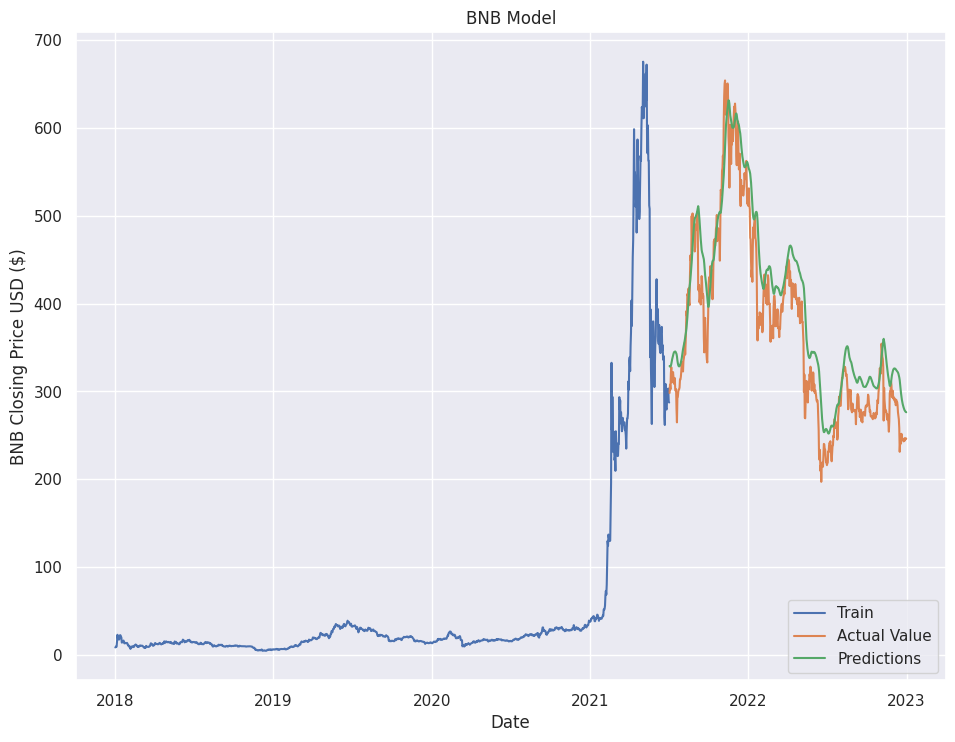

In [ ]:
# Data Plot

train = bnbClose[:bnbLen]
valid = bnbClose[bnbLen:]
valid['Predictions'] = bnbPredictions

plt.figure(figsize=(10,8))
plt.title('BNB Model')
plt.xlabel('Date')
plt.ylabel('BNB Closing Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Actual Value','Predictions'], loc='lower right')
plt.show()

## Model 4 - Dogecoin Model

In [ ]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(dogeCloseArr)

# Get the Training Data
dogeLen = trainLen(dogeCloseArr)
trainingData = scaledData[0:dogeLen, :]

# Train & Test Split
x_train = []
y_train = []

for i in range(60, len(trainingData)):
  x_train.append(trainingData[i-60:i,0])
  y_train.append(trainingData[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


# Build the LSTM Model

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

# Train the model

model.fit(x_train,y_train,batch_size=1,epochs=1)


1219/1219 [==============================] - 46s 35ms/step - loss: 0.0030


In [ ]:
# Testing Data Set

testData = scaledData[dogeLen - 60: , :]

x_test = []

y_test = dogeCloseArr[dogeLen:, :]

for i in range(60, len(testData)):
  x_test.append(testData[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
# Prediction on the Testing Set

dogePredictions = model.predict(x_test)
dogePredictions = scaler.inverse_transform(dogePredictions)

18/18 [==============================] - 1s 21ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
x = mean_absolute_error(y_test, dogePredictions)
x


0.013180893295916169

In [ ]:
## Mean Squared Error

mse = mean_squared_error(y_test, dogePredictions)
mse

0.0003518345138045913

In [ ]:
# Root Mean Squared Error

rmse = np.sqrt(mse)
rmse

0.013884490223632022

<ipython-input-92-498349148e8a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = dogePredictions


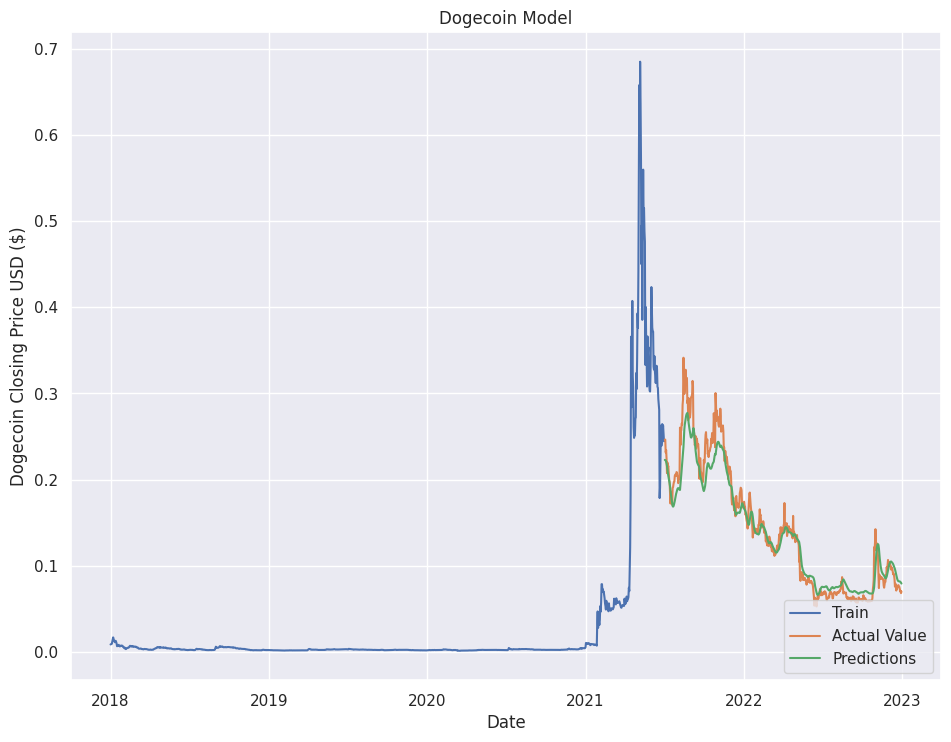

In [ ]:
# Data Plot

train = dogeClose[:dogeLen]
valid = dogeClose[dogeLen:]
valid['Predictions'] = dogePredictions

plt.figure(figsize=(10,8))
plt.title('Dogecoin Model')
plt.xlabel('Date')
plt.ylabel('Dogecoin Closing Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Actual Value','Predictions'], loc='lower right')
plt.show()

## Model 5 - Ethereum Model

In [ ]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(ethCloseArr)

# Get the Training Data
ethLen = trainLen(ethCloseArr)
trainingData = scaledData[0:ethLen, :]

# Train & Test Split
x_train = []
y_train = []

for i in range(60, len(trainingData)):
  x_train.append(trainingData[i-60:i,0])
  y_train.append(trainingData[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


# Build the LSTM Model

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

# Train the model

model.fit(x_train,y_train,batch_size=1,epochs=1)


1219/1219 [==============================] - 48s 37ms/step - loss: 0.0021


In [ ]:
# Testing Data Set

testData = scaledData[ethLen - 60: , :]

x_test = []

y_test = ethCloseArr[ethLen:, :]

for i in range(60, len(testData)):
  x_test.append(testData[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
# Prediction on the Testing Set

ethPredictions = model.predict(x_test)
ethPredictions = scaler.inverse_transform(ethPredictions)

18/18 [==============================] - 2s 28ms/step


In [ ]:

from sklearn.metrics import mean_absolute_percentage_error
x = mean_absolute_percentage_error(y_test, ethPredictions)
x



0.23014526901287866

In [ ]:
## Mean Squared Error

mse = mean_squared_error(y_test, ethPredictions)
mse

683470.9930122376

In [ ]:
# Root Mean Squared Error

rmse = np.sqrt(mse)
rmse

356.41305467454345

<ipython-input-99-0b804c30f28d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = ethPredictions


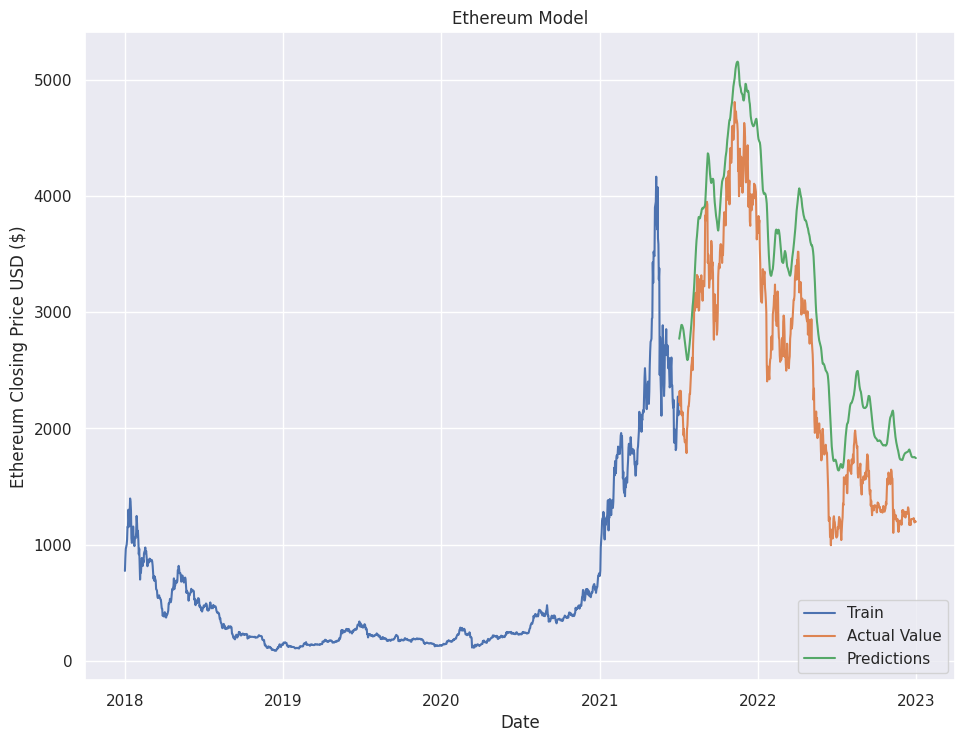

In [ ]:
# Data Plot

train = ethClose[:ethLen]
valid = ethClose[ethLen:]
valid['Predictions'] = ethPredictions

plt.figure(figsize=(10,8))
plt.title('Ethereum Model')
plt.xlabel('Date')
plt.ylabel('Ethereum Closing Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Actual Value','Predictions'], loc='lower right')
plt.show()

## Model 6 - Bitcoin Model

In [ ]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(btcCloseArr)

# Get the Training Data
btcLen = trainLen(btcCloseArr)
trainingData = scaledData[0:btcLen, :]

# Train & Test Split
x_train = []
y_train = []

for i in range(60, len(trainingData)):
  x_train.append(trainingData[i-60:i,0])
  y_train.append(trainingData[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


# Build the LSTM Model

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

# Train the model

model.fit(x_train,y_train,batch_size=1,epochs=1)


1219/1219 [==============================] - 45s 34ms/step - loss: 0.0032


In [ ]:
# Testing Data Set

testData = scaledData[btcLen - 60: , :]

x_test = []

y_test = btcCloseArr[btcLen:, :]

for i in range(60, len(testData)):
  x_test.append(testData[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
# Prediction on the Testing Set

btcPredictions = model.predict(x_test)
btcPredictions = scaler.inverse_transform(btcPredictions)

18/18 [==============================] - 1s 18ms/step


In [ ]:
## MAPE

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test,btcPredictions)
mape

0.06138807091116475

In [ ]:
## Mean Squared Error

mse = mean_squared_error(y_test, btcPredictions)
mse

13712691.862097431

In [ ]:
# Root Mean Squared Error

rmse = np.sqrt(mse)
rmse

3703.0651981969518

<ipython-input-75-88004778cb12>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = btcPredictions


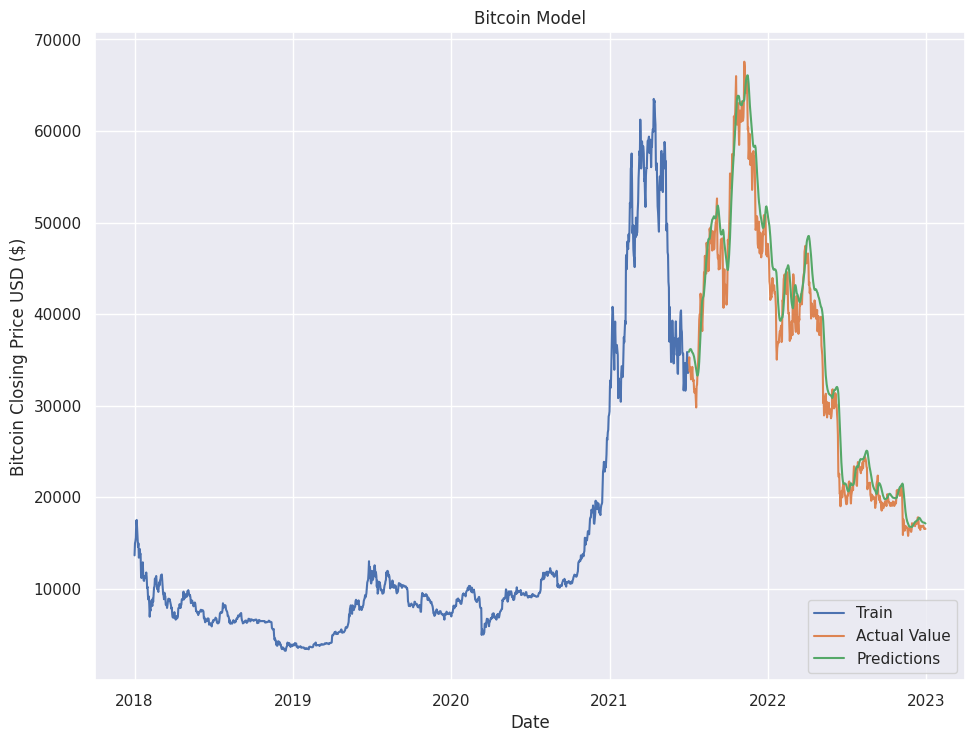

In [ ]:
# Data Plot

train = btcClose[:btcLen]
valid = btcClose[btcLen:]
valid['Predictions'] = btcPredictions

plt.figure(figsize=(10,8))
plt.title('Bitcoin Model')
plt.xlabel('Date')
plt.ylabel('Bitcoin Closing Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Actual Value','Predictions'], loc='lower right')
plt.show()

## Model 7 - XRP Model

In [ ]:
# Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaledData = scaler.fit_transform(xrpCloseArr)

# Get the Training Data
xrpLen = trainLen(xrpCloseArr)
trainingData = scaledData[0:xrpLen, :]

# Train & Test Split
x_train = []
y_train = []

for i in range(60, len(trainingData)):
  x_train.append(trainingData[i-60:i,0])
  y_train.append(trainingData[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


# Build the LSTM Model

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

# Train the model

model.fit(x_train,y_train,batch_size=1,epochs=1)


1219/1219 [==============================] - 51s 38ms/step - loss: 0.0011


In [ ]:
# Testing Data Set

testData = scaledData[xrpLen - 60: , :]

x_test = []

y_test = xrpCloseArr[xrpLen:, :]

for i in range(60, len(testData)):
  x_test.append(testData[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
# Prediction on the Testing Set

xrpPredictions = model.predict(x_test)
xrpPredictions = scaler.inverse_transform(xrpPredictions)

18/18 [==============================] - 1s 20ms/step


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_error(y_test,xrpPredictions)
mape

0.03266518948500945

In [ ]:
## Mean Squared Error

mse = mean_squared_error(y_test, xrpPredictions)
mse

0.002576431365351233

In [ ]:
# Root Mean Squared Error

rmse = np.sqrt(mse)
rmse

0.1815120760207595

In [ ]:


from sklearn.metrics import mean_absolute_percentage_error
x = mean_absolute_percentage_error(y_test, xrpPredictions)
x

0.18384816110288404

In [ ]:
.

<ipython-input-94-de7b7a9fb565>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = xrpPredictions


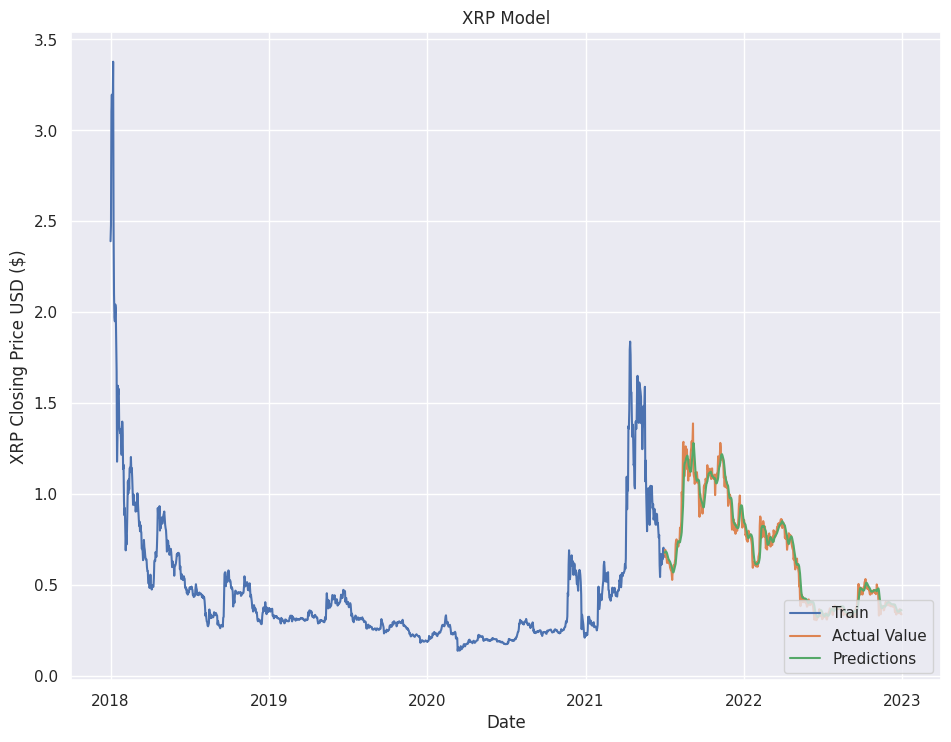

In [ ]:
# Data Plot

train = xrpClose[:xrpLen]
valid = xrpClose[xrpLen:]
valid['Predictions'] = xrpPredictions

plt.figure(figsize=(10,8))
plt.title('XRP Model')
plt.xlabel('Date')
plt.ylabel('XRP Closing Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Actual Value','Predictions'], loc='lower right')
plt.show()

# Sentiment Analysis

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk.stem import SnowballStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
alttweets = pd.read_csv("tweets.csv",lineterminator='\n').drop('Unnamed: 0', axis=1)
# ethtweets = pd.read_csv("Ethereum_tweets.csv")
btctweets = pd.read_csv("btctweets.csv")

In [ ]:
alttweets['Currency'] = 'AltCoin'
# ethtweets['Currency'] = 'Ethereum'
btctweets['Currency'] = 'Bitcoin'

In [ ]:
altDf = alttweets[['Currency','Content']]
# ethDf = ethtweets[['Currency','text']]
btcDf = btctweets[['Currency','Tweet Content']]


altDf.rename(columns = {'Content':'Tweet'}, inplace = True)
# ethDf.rename(columns = {'text':'Tweet'}, inplace = True)
btcDf.rename(columns = {'Tweet Content':'Tweet'}, inplace = True)


<ipython-input-11-c6c1e743b700>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  altDf.rename(columns = {'Content':'Tweet'}, inplace = True)
<ipython-input-11-c6c1e743b700>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btcDf.rename(columns = {'Tweet Content':'Tweet'}, inplace = True)


In [ ]:
df = pd.concat([altDf,btcDf])
df

,Currency,Tweet
0,AltCoin,#Ethereum price update: \n\n#ETH $1269.23 USD\...
1,AltCoin,@mtmalinen @ecb Do well to understand that eve...
2,AltCoin,Kayla #Ethereum Harold #世界杯 Egbert #百家乐 Lavern...
3,AltCoin,#Bitcoin https://t.co/2koLlCvCri https://t.co/...
4,AltCoin,"Yesterday we made a 3,000 SLAM buyback and loc..."
...,...,...
7212,Bitcoin,"""🎁Prymx Giveaway!! Part 2\n Win $15 instantly💰..."
7213,Bitcoin,"""Promote it on @nftmarkettplace"""
7214,Bitcoin,"""Profilime sabitlediğim tweeti RT yapan bir ta..."
7215,Bitcoin,"""New airdrop: Puffverse (USDT)\nTotal Reward: ..."


In [ ]:
# Remove stop words

stop=set(nltk.corpus.stopwords.words("english"))
lemma=WordNetLemmatizer()

def removeStopWord(text):
  text=[word.lower() for word in text.split() if word.lower() not in stop]
  return " ".join(text)

In [ ]:
df['Tweet'] = df['Tweet'].apply(removeStopWord)

In [ ]:
# Function to Remove Punctuation

def removePunc(text):
  import string as st
  t=[w for w in text if w not in st.punctuation]
  return ''.join(t)

def removeSymbols(x):

  t = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ',x)
  return t

df['Tweet'] = df['Tweet'].apply(removePunc)
df['Tweet'] = df['Tweet'].apply(removeSymbols)



In [ ]:
df

,Currency,Tweet
0,AltCoin,ethereum price update eth 126923 usd bitcoin 0...
1,AltCoin,mtmalinen ecb well understand every dip price ...
2,AltCoin,kayla ethereum harold egbert laverna httpstcos...
3,AltCoin,bitcoin httpstco2kollcvcri httpstcomtr3woxlb9
4,AltCoin,yesterday made 3000 slam buyback locked foreve...
...,...,...
7212,Bitcoin,prymx giveaway part 2 win 15 instantly for fi...
7213,Bitcoin,promote nftmarkettplace
7214,Bitcoin,profilime sabitledi im tweeti rt yapan bir tak...
7215,Bitcoin,new airdrop puffverse usdt total reward 1000 u...


In [ ]:
# Normalization and Stemming

def stemming(text):
  stem=[]
  stopword = stopwords.words('english')
  ss = SnowballStemmer('english')
  tokens = nltk.word_tokenize(text)
  text = [ss.stem(word) for word in tokens]
  result=' '.join(text)
  return result

In [ ]:
df['Tweet'] = df['Tweet'].apply(stemming)
df['Tweet'] = df['Tweet'].str.lower()


## Vader Sentiment Analyzer

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
sentimentIns = SentimentIntensityAnalyzer()

In [ ]:
def implementVader(text):
  return sentimentIns.polarity_scores(text)['compound']

In [ ]:
df['sentiments'] = df['Tweet'].apply(implementVader)

In [ ]:
def categorise(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
  if sentiment < neg_threshold:
    label = 'negative'
  elif sentiment > pos_threshold:
    label = 'positive'
  else:
    label = 'neutral'
  return label

In [ ]:
df['Tweet Sentiment'] = df['sentiments'].apply(categorise)
df = df[['Currency','Tweet','Tweet Sentiment']]


## Sentiment Distribution

In [ ]:
countSentiment = df.groupby(['Tweet Sentiment', 'Currency'])['Tweet'].count().reset_index()

In [ ]:
btcCount = countSentiment.loc[[1, 3, 5], 'Tweet']
countSentiment.loc[[1, 3, 5], 'Tweet'] = btcCount.div(btcCount.sum(), axis=0)

In [ ]:
altCount = countSentiment.loc[[0, 2, 4], 'Tweet']
countSentiment.loc[[0, 2, 4], 'Tweet'] = altCount.div(altCount.sum(), axis=0)

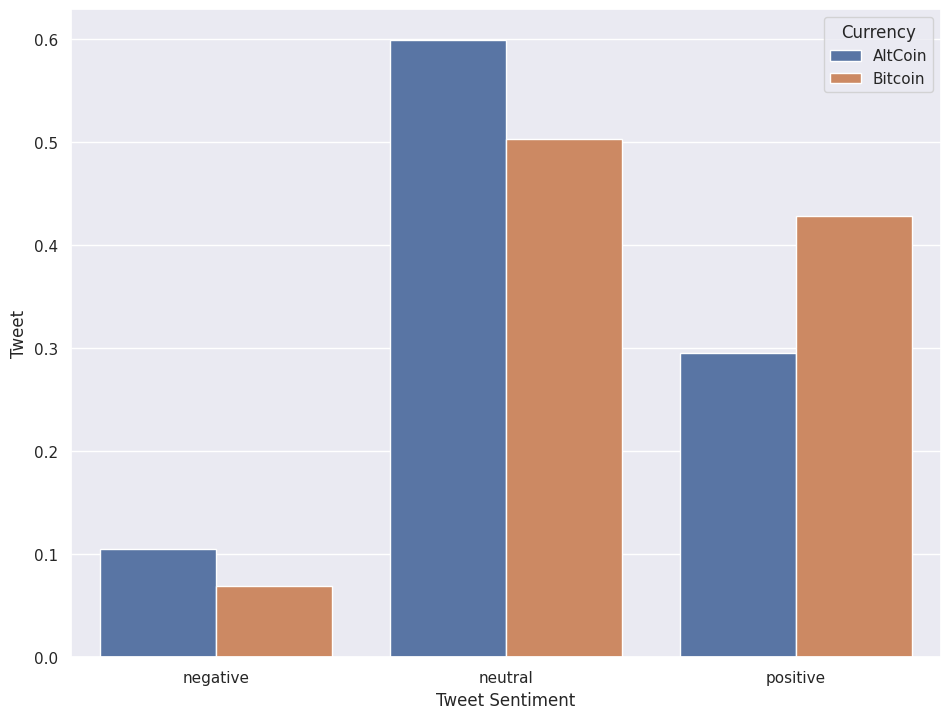

In [ ]:
countSentiment.head(6)
plt.figure(figsize=(10,8))
sns.barplot(data=countSentiment, x='Tweet Sentiment', y='Tweet', hue='Currency')
plt.show()

## Classification

In [ ]:
newDf = df[df['Tweet Sentiment'] == 'positive']
newDf.to_csv('newDf.csv', index=False)

In [ ]:
import multiprocessing as mp

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import spacy

nlp = spacy.load(
"en_core_web_sm",exclude=["tagger", "parser", "ner", "lemmatizer", "attribute_ruler"],
)


In [ ]:
def tokenize(text):
    doc = nlp.tokenizer(text)
    return [t.norm_ for t in doc if t.is_alpha]

In [ ]:
newDf["tokens"] = newDf["Tweet"].progress_apply(tokenize)


AttributeError: ignored

In [ ]:
from sklearn.dummy import DummyClassifier
from tqdm.auto import tqdm
tqdm.pandas()

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5432)
baseline = DummyClassifier()
cross_val_score(baseline, newDf["tokens"], newDf["Tweet"], cv=cv)


In [ ]:
predicted = cross_val_predict(baseline, newDf["tokens"], newDf["Tweet"], cv=cv)
print(classification_report(newDf["Tweet"], predicted))


#Bernoulli Naive Bayes

In [ ]:
import sklearn.naive_bayes as nb
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf = TfidfVectorizer()
X = tf.fit_transform(newDf['Tweet'])

In [ ]:
y = newDf['Currency']

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [ ]:
bnb =nb.BernoulliNB(alpha=.2)

In [ ]:
bnb.fit(X_train, y_train)

BernoulliNB(alpha=0.2)

In [ ]:
print(classification_report(y_test, bnb.predict(X_test), digits=4))

              precision    recall  f1-score   support

     AltCoin     0.8296    0.9704    0.8945       913
     Bitcoin     0.9639    0.7982    0.8733       902

    accuracy                         0.8848      1815
   macro avg     0.8967    0.8843    0.8839      1815
weighted avg     0.8963    0.8848    0.8839      1815



In [ ]:
print(bnb.score(X_test, y_test))
print(bnb.score(X_train, y_train))

0.8848484848484849
0.9473062381852552


In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

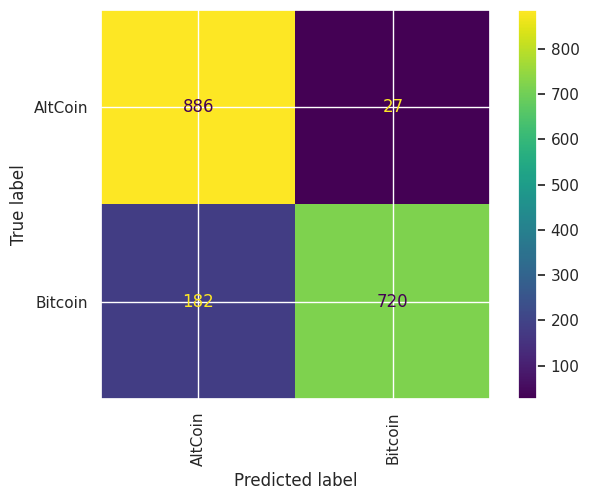

In [ ]:
ConfusionMatrixDisplay.from_estimator(bnb, X_test, y_test, xticks_rotation=90)

In [ ]:
y_pred = bnb.predict(tf.transform([
"Bitcoin is  looking good these days while the other coin are not!"]))
print(y_pred)

['AltCoin']


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(bnb, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {:.4f}'.format(scores.mean()))
print('Train Accuracy : %.3f'%bnb.score(X_train, y_train))
print('Test Accuracy : %.3f'%bnb.score(X_test, y_test))

Cross-validation scores:[0.90330189 0.85141509 0.89834515 0.88416076 0.88179669 0.84160757
 0.87470449 0.86524823 0.89834515 0.89125296]
Average cross-validation score: 0.8790
Train Accuracy : 0.947
Test Accuracy : 0.885
